  # Введение в оценку моделей

## Оценка качества моделей

Оценка качества моделей машинного обучения - это критически важный этап в процессе разработки, который позволяет:

- Определить, насколько хорошо модель решает поставленную задачу
- Сравнить различные модели между собой для выбора оптимальной
- Выявить проблемы переобучения или недообучения
- Понять, готова ли модель к использованию в реальных условиях

Для оценки моделей используются различные метрики, выбор которых зависит от типа задачи (классификация, регрессия и т.д.) и конкретных бизнес-требований. Правильно подобранные метрики помогают объективно оценить качество модели и принять обоснованное решение о её внедрении или необходимости дальнейшей доработки.

## Разница между метриками качества и функцией потерь

### Функция потерь (Loss Function)

**Функция потерь** - это математическая функция, которая:

- Используется непосредственно в процессе обучения модели
- Количественно оценивает ошибку модели на каждом шаге обучения
- Минимизируется алгоритмами оптимизации (например, градиентным спуском)
- Часто выбирается с учетом математических свойств (дифференцируемость, выпуклость)
- Примеры: MSE (Mean Squared Error), Cross-Entropy Loss, Hinge Loss

### Метрики качества (Evaluation Metrics)

**Метрики качества** - это показатели, которые:

- Используются для оценки итоговой производительности модели
- Более понятны с точки зрения бизнес-задачи
- Могут не быть дифференцируемыми или удобными для оптимизации
- Часто используются для сравнения разных моделей
- Примеры: Accuracy, Precision, Recall, F1-score, R², RMSE, MAE

### Ключевые отличия

1. **Назначение**:
    - Функция потерь: инструмент для обучения модели
    - Метрики: инструмент для оценки и интерпретации результатов


2. **Оптимизация**:
    - Модель напрямую оптимизирует функцию потерь
    - Метрики используются для оценки, но не всегда напрямую оптимизируются


3. **Выбор**:
    - Функция потерь выбирается с учетом математических свойств и типа модели
    - Метрики выбираются с учетом бизнес-требований и особенностей задачи

В некоторых случаях функция потерь может совпадать с метрикой (например, MSE), но часто они различаются. Важно понимать эту разницу при разработке и оценке моделей машинного обучения.

## Задачи классификации и регрессии

### Классификация

- Предсказывает дискретные классы/категории
- Примеры: обнаружение спама, диагностика заболеваний
- Метрики: точность, полнота, F1-мера
- Типы ошибок: ложноположительные, ложноотрицательные

### Регрессия

- Предсказывает непрерывные значения
- Примеры: цены на жилье, прогноз температуры
- Метрики: MSE, MAE, R²
- Типы ошибок: переоценка/недооценка

In [3]:
import pandas as pd

cls_demo_df = pd.read_csv('/Users/mikhail/Data Science Projects/Цифровая кафедра/ML/Module 3.4 Метрики и функции потерь/classification_demo_v1.csv')
cls_demo_df.head()


,true_label,probability,pred_threshold_0.5,prediction_type
0,0.0,0.129606,0,TN
1,0.0,0.402050,0,TN
2,0.0,0.471266,0,TN
3,0.0,0.404328,0,TN
4,0.0,0.105332,0,TN


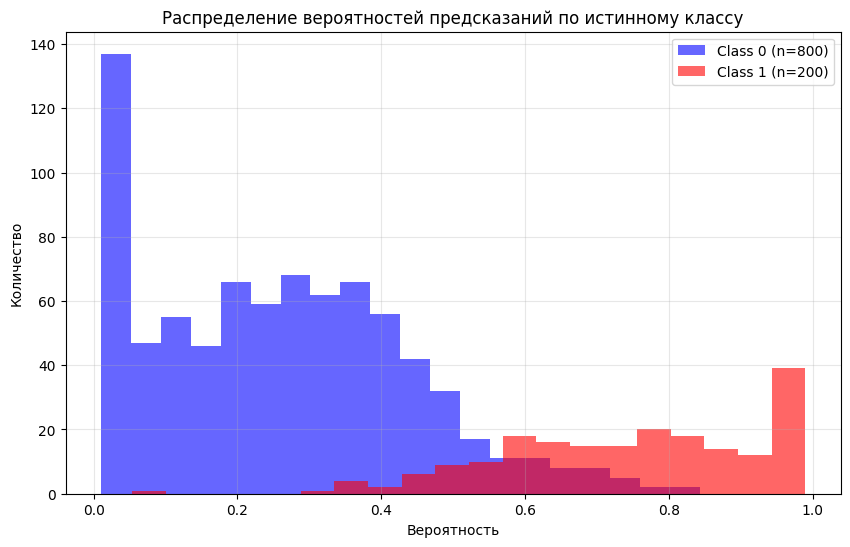

In [4]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
for label, color in zip([0, 1], ['blue', 'red']):
    probs = cls_demo_df[cls_demo_df['true_label'] == label]['probability']
    plt.hist(probs, bins=20, alpha=0.6, color=color, 
             label=f'Class {label} (n={len(probs)})')


plt.xlabel('Вероятность')
plt.ylabel('Количество')
plt.title('Распределение вероятностей предсказаний по истинному классу')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



  # Метрики классификации

## Матрица Ошибок (Confusion Matrix)

Матрица ошибок - это таблица, которая позволяет визуализировать эффективность модели классификации. Она показывает соотношение между предсказанными и истинными классами:

- **True Positives (TP)**: Правильно предсказанные положительные случаи
- **True Negatives (TN)**: Правильно предсказанные отрицательные случаи  
- **False Positives (FP)**: Неправильно предсказанные положительные случаи (ошибка I типа)
- **False Negatives (FN)**: Неправильно предсказанные отрицательные случаи (ошибка II типа)

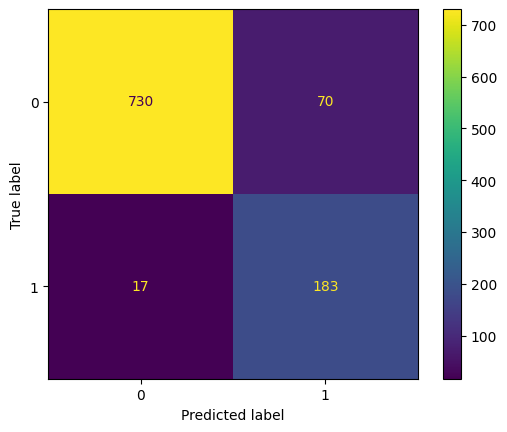

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
conf_matrix = confusion_matrix(cls_demo_df['true_label'], cls_demo_df['pred_threshold_0.5'])

# Print confusion matrix
ConfusionMatrixDisplay(conf_matrix).plot()

In [6]:
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
tp = conf_matrix[1, 1]

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

True Positives (TP): 183
True Negatives (TN): 730
False Positives (FP): 70
False Negatives (FN): 17



## Метрики классификации основанные на матрице ошибок

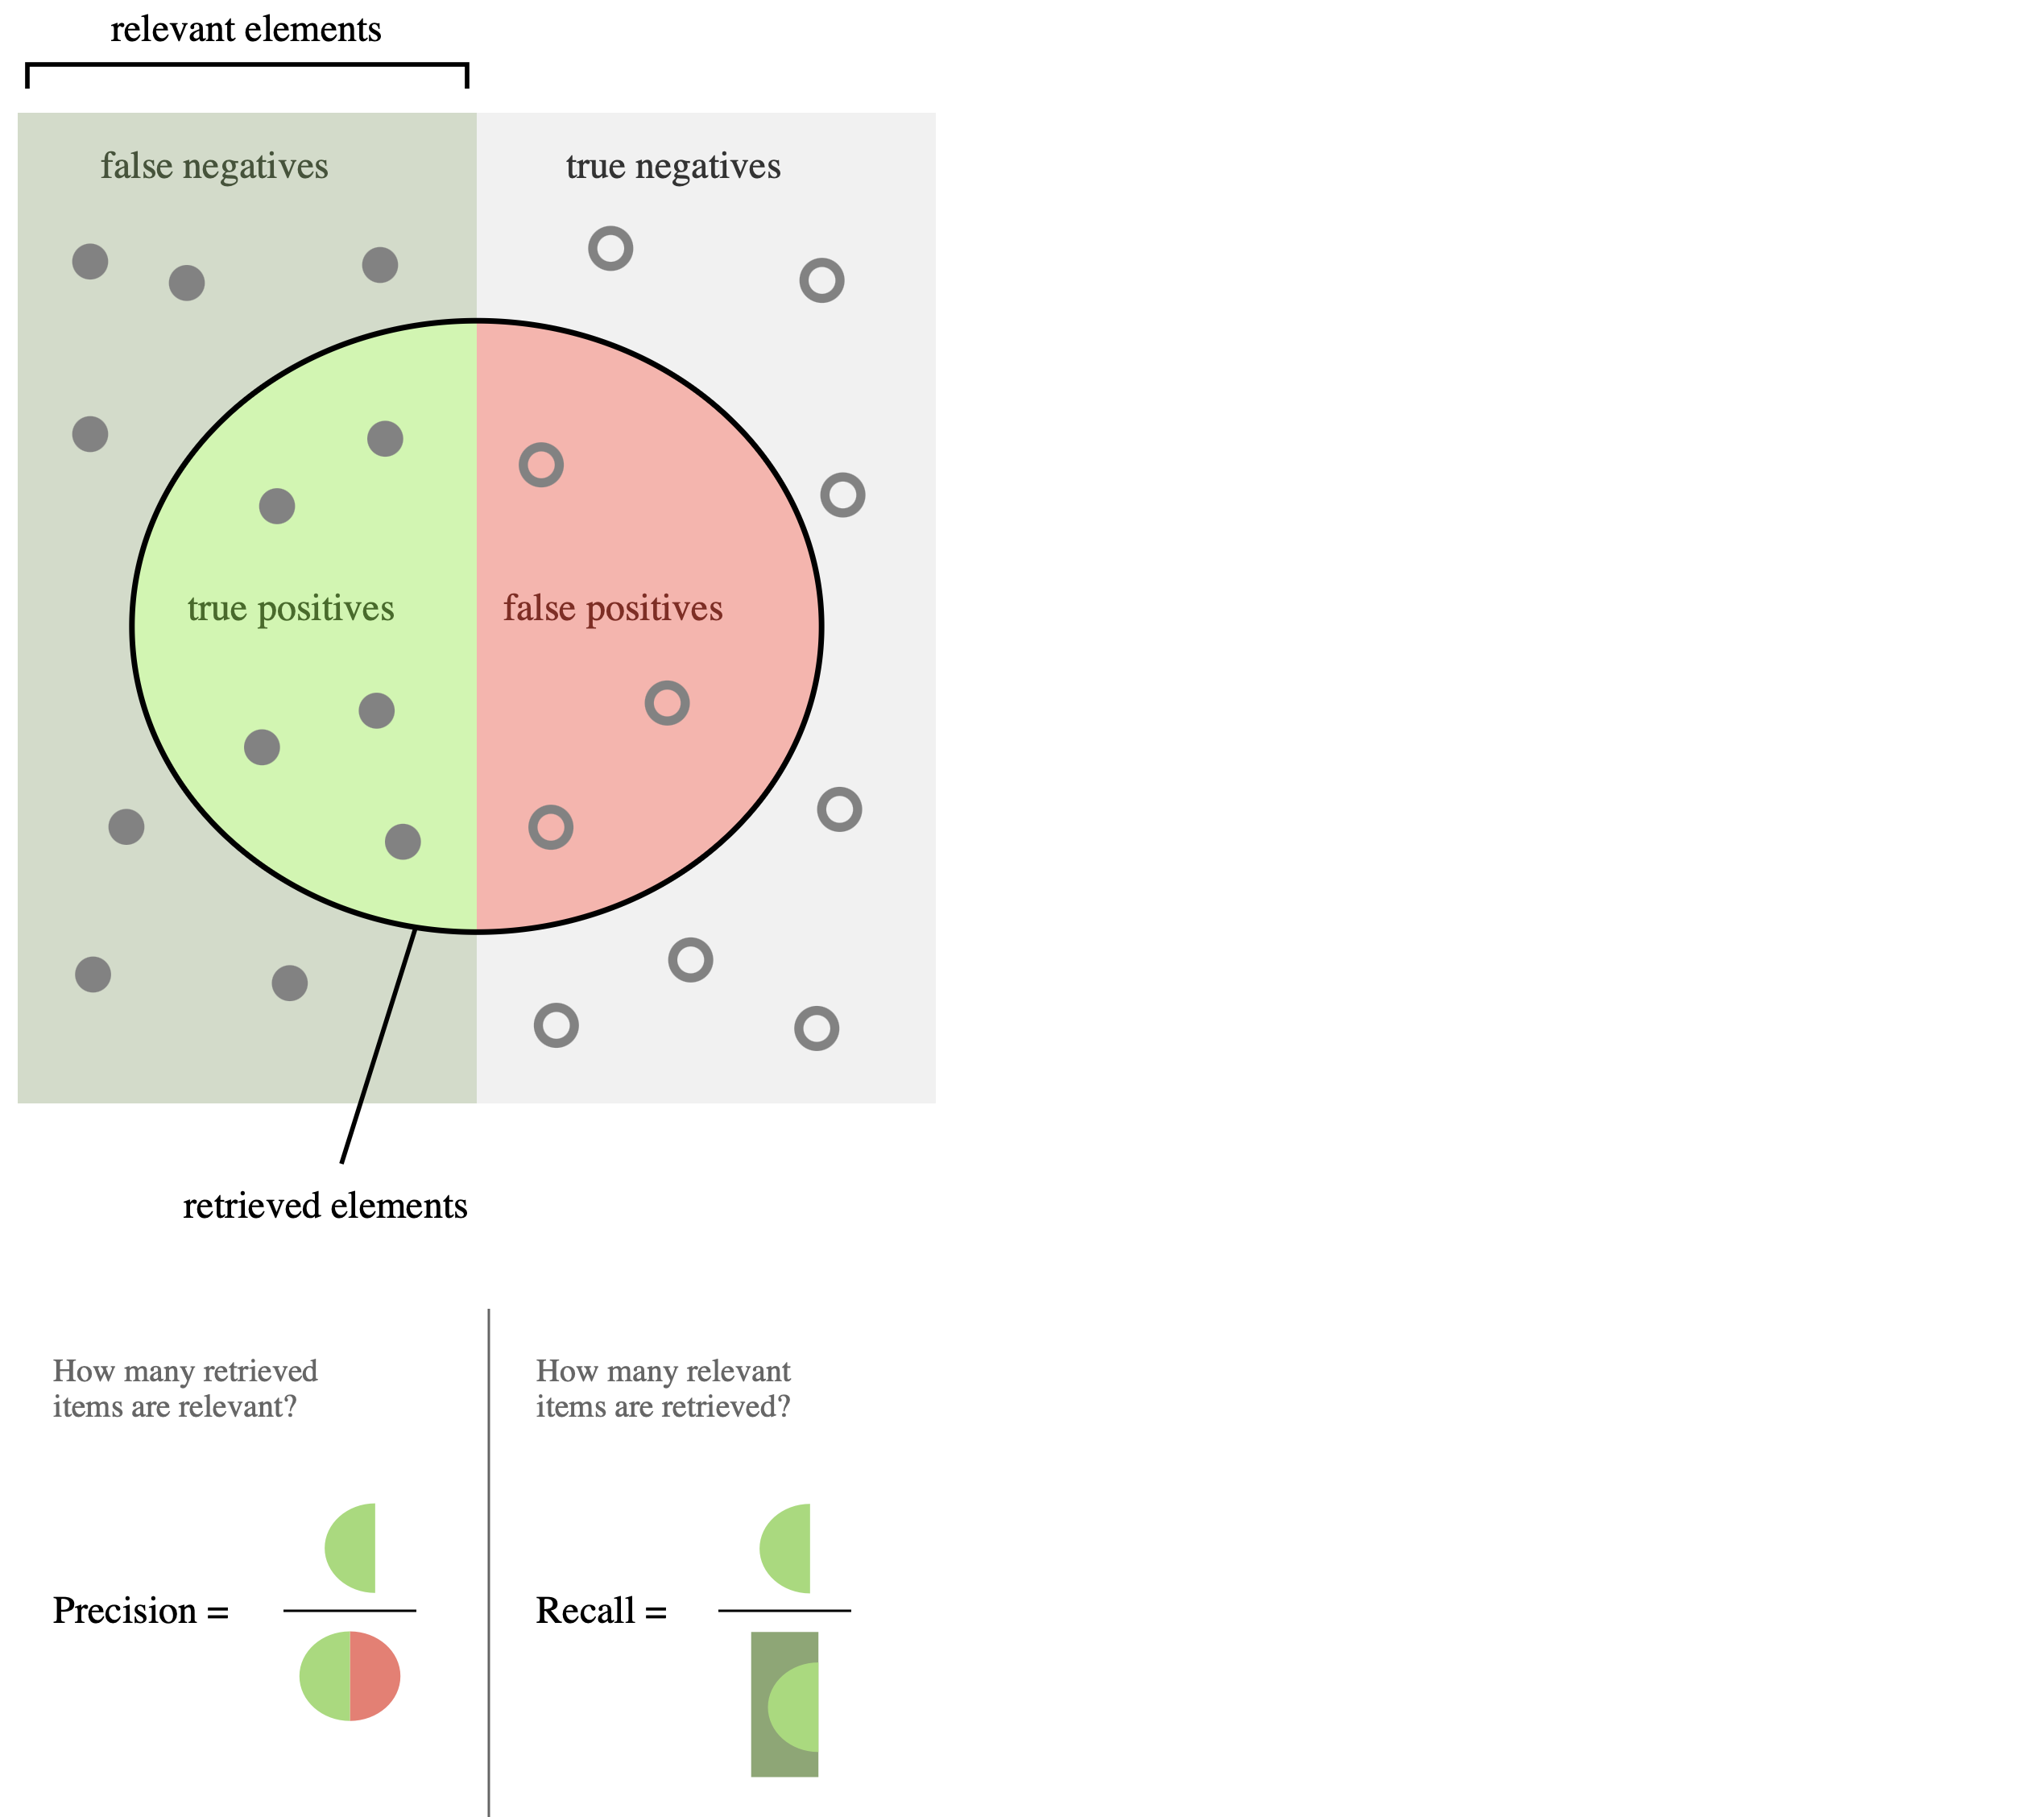

### Accuracy

Доля правильных прогнозов.

$$ \frac{TP + TN} {TP + TN + FP + FN} $$

- Ограничения: Может вводить в заблуждение при несбалансированных данных

### Precision (Точность)

Когда модель предсказывает положительный класс, как часто она права?

$$ \frac{TP}{TP + FP} $$

- Используется, когда ложноположительные результаты дорого обходятся

### Recall (Полнота)

Какая доля фактических положительных случаев была выявлена?

$$ \frac{TP} {TP + FN} $$

- Используется, когда ложноотрицательные результаты дорого обходятся

### F1-мера

Гармоническое среднее точности и полноты.

$$ \frac{2 * (precision * recall)} {precision + recall} $$

- Балансирует точность и полноту

### F-beta мера

Гармоническое среднее точности и полноты с учетом веса beta.

$$ \frac{(1 + \beta^2) * (precision * recall)} {\beta^2 * precision + recall} $$

- Используется, когда ошибки разных типов имеют разный вес

### Specificity (Специфичность)

Доля правильно идентифицированных отрицательных случаев.

$$ \frac{TN} {TN + FP} $$

### Balanced Accuracy (Сбалансированная точность)

Среднее значение полноты и специфичности.

$$ \frac {Recall + Specificity} {2} $$

- Лучше для несбалансированных наборов данных

### Support (Поддержка)

Количество примеров в каждом классе.


In [7]:
from sklearn.metrics import accuracy_score

accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy_sklearn = accuracy_score(cls_demo_df['true_label'], cls_demo_df['pred_threshold_0.5'])

print(f"Accuracy: {accuracy}")
print(f"Accuracy(sklearn): {accuracy_sklearn}")

Accuracy: 0.913
Accuracy(sklearn): 0.913


In [8]:
from sklearn.metrics import precision_score

precision = tp / (tp + fp)
precision_sklearn = precision_score(cls_demo_df['true_label'], cls_demo_df['pred_threshold_0.5'])

print(f"Precision: {precision}")
print(f"Precision(sklearn): {precision_sklearn}")

Precision: 0.7233201581027668
Precision(sklearn): 0.7233201581027668


In [9]:
from sklearn.metrics import recall_score

recall = tp / (tp + fn)
recall_sklearn = recall_score(cls_demo_df['true_label'], cls_demo_df['pred_threshold_0.5'])

print(f"Recall: {recall}")
print(f"Recall(sklearn): {recall_sklearn}")

Recall: 0.915
Recall(sklearn): 0.915


In [10]:
from sklearn.metrics import f1_score

f1_score_manual = 2 * (precision * recall) / (precision + recall)
f1_score_sklearn = f1_score(cls_demo_df['true_label'], cls_demo_df['pred_threshold_0.5'])

print(f"F1-score: {f1_score_manual}")
print(f"F1-score(sklearn): {f1_score_sklearn}")

F1-score: 0.8079470198675497
F1-score(sklearn): 0.8079470198675497


In [11]:
support = tp + fn

print(f"Support: {support}")

Support: 200


In [12]:
specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")
print(f"Specificity(sklearn): N/A")

Specificity: 0.9125
Specificity(sklearn): N/A


In [13]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = (recall + specificity) / 2
balanced_accuracy_sklearn = balanced_accuracy_score(
    cls_demo_df['true_label'], cls_demo_df['pred_threshold_0.5']
)

print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"Balanced Accuracy (sklearn): {balanced_accuracy_sklearn}")

Balanced Accuracy: 0.9137500000000001
Balanced Accuracy (sklearn): 0.9137500000000001


  Все вышеперечисленные метрики зависят от порога классификации. Порог мы подбираем в зависимости от предметной области и задачи. Например, если мы хотим избежать ложноположительных результатов при этом жертвуя полнотой, мы можем увеличить порог, и наоборот.



  Давайте посмотрим: как поменяются метрики при повышении порога классификации.

In [14]:
from sklearn.metrics import precision_recall_fscore_support

# Повышение порога классификации
cls_demo_df['pred_threshold_0.9'] = (cls_demo_df['probability'] > 0.9).astype(int)

# Calculate precision, recall, F1-score, and support
precision_sklearn, recall_sklearn, f1_score_sklearn, support_sklearn = precision_recall_fscore_support(
    cls_demo_df['true_label'], cls_demo_df['pred_threshold_0.9']
)

print(f"Precision: {precision_sklearn[1]}")
print(f"Recall: {recall_sklearn[1]}")
print(f"F1-score: {f1_score_sklearn[1]}")
print(f"Support: {support_sklearn[1]}")

Precision: 1.0
Recall: 0.25
F1-score: 0.4
Support: 200


## Демонстрация ограничений Accuracy на несбалансированных данных

In [15]:
# Сразу импортируем всё, что понадобится для демонстрации примера:

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [16]:
# Загрузка набора данных по кредитному риску (имеет несбалансированные классы):
credit_g = fetch_openml('credit-g', version=1, as_frame=True)
X = credit_g.data
y = credit_g.target

# Преобразуем метки классов в числовые значения (0 и 1)
y = (y == 'bad').astype(int)  # 'bad' -> 1, 'good' -> 0

# Проверка распределения классов
class_counts = pd.Series(y).value_counts()
print("Распределение классов:")
print(class_counts)
print(f"Соотношение классов (1/0): {class_counts[1] / class_counts[0]:.2f}")

Распределение классов:
0    700
1    300
Name: class, dtype: int64
Соотношение классов (1/0): 0.43


/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [17]:
# Определим категориальные признаки
categorical_features = X.select_dtypes(include=['category', 'object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print("Категориальные признаки:", len(categorical_features))
print("Числовые признаки:", len(numerical_features))

Категориальные признаки: 13
Числовые признаки: 7


In [18]:
# Создаем препроцессор для преобразования категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ],
    remainder='passthrough'  # числовые признаки оставляем без изменений
)

In [19]:
# Создаем пайплайн с препроцессором и моделью
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])

In [20]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучение пайплайна
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [21]:
# Предсказания
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # вероятности для положительного класса (класс 1)

# Создание DataFrame для наглядности
imbalanced_df = pd.DataFrame({
    'true_label': y_test,
    'prediction': y_pred,
    'probability': y_prob
})

In [22]:
# Расчет метрик
accuracy = accuracy_score(imbalanced_df['true_label'], imbalanced_df['prediction'])
precision = precision_score(imbalanced_df['true_label'], imbalanced_df['prediction'])
recall = recall_score(imbalanced_df['true_label'], imbalanced_df['prediction'])
f1 = f1_score(imbalanced_df['true_label'], imbalanced_df['prediction'])
balanced_acc = balanced_accuracy_score(imbalanced_df['true_label'], imbalanced_df['prediction'])

print("\nМетрики классификации:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")


Метрики классификации:
Accuracy: 0.7867
Precision: 0.6912
Recall: 0.5222
F1-score: 0.5949
Balanced Accuracy: 0.7111


In [23]:
# Наивная модель, которая всегда предсказывает доминирующий класс
majority_class = pd.Series(y_test).value_counts().idxmax()
majority_prediction = np.array([majority_class] * len(y_test))
majority_accuracy = accuracy_score(y_test, majority_prediction)
majority_balanced_acc = balanced_accuracy_score(y_test, majority_prediction)

print(f"\nAccuracy наивной модели (всегда предсказывает доминирующий класс): {majority_accuracy:.4f}")
print(f"Balanced Accuracy наивной модели: {majority_balanced_acc:.4f}")


Accuracy наивной модели (всегда предсказывает доминирующий класс): 0.7000
Balanced Accuracy наивной модели: 0.5000


In [24]:
majority_precision = precision_score(y_test, majority_prediction)
majority_recall = recall_score(y_test, majority_prediction)
majority_f1 = f1_score(y_test, majority_prediction)

print(f"Precision наивной модели: {majority_precision:.4f}")
print(f"Precision logreg: {precision:.4f}")
print(f"Recall наивной модели: {majority_recall:.4f}")
print(f"Recall logreg: {recall:.4f}")
print(f"F1-score наивной модели: {majority_f1:.4f}")
print(f"F1-score logreg: {f1:.4f}")

Precision наивной модели: 0.0000
Precision logreg: 0.6912
Recall наивной модели: 0.0000
Recall logreg: 0.5222
F1-score наивной модели: 0.0000
F1-score logreg: 0.5949


/Users/mikhail/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Вывод

На несбалансированных данных метрика **Accuracy** может ввести в заблуждение. Даже наивная модель, которая всегда предсказывает доминирующий класс, может показать высокое значение **Accuracy**.

**Balanced Accuracy**, **Precision**, **Recall** и **F1-score** лучше отражают качество модели в таких случаях.

## Метрики для мультиклассовой классификации

Для мультиклассовой классификации мы можем использовать следующие метрики:

- **Accuracy (Точность)**: Доля правильных прогнозов


- **Precision (Точность)**: Когда модель предсказывает положительный класс, как часто она права?


- **Recall (Полнота)**: Какая доля фактических положительных случаев была выявлена?


- **F1-мера**: Гармоническое среднее точности и полноты


Обычно эти метрики вычисляются для каждого класса и затем усредняются по всем классам. Есть несколько способов усреднения:


- **Micro-average**: Суммируются все TP, TN, FP, FN и усредняются по всем классам


- **Macro-average**: Суммируются все TP, TN, FP, FN для каждого класса и усредняются по всем классам


- **Weighted-average**: Суммируются все TP, TN, FP, FN для каждого класса и усредняются по всем классам, при этом учитывается количество примеров в каждом классе

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Создание более сложного синтетического набора данных с 3 классами
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                          n_redundant=5, n_classes=3, n_clusters_per_class=2,
                          weights=[0.5, 0.4, 0.1], random_state=42)

class_names = ['Class 0', 'Class 1', 'Class 2']

print("Распределение классов:")
for i, name in enumerate(class_names):
    print(f"{name}: {sum(y == i)}")

Распределение классов:
Class 0: 497
Class 1: 401
Class 2: 102


In [26]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

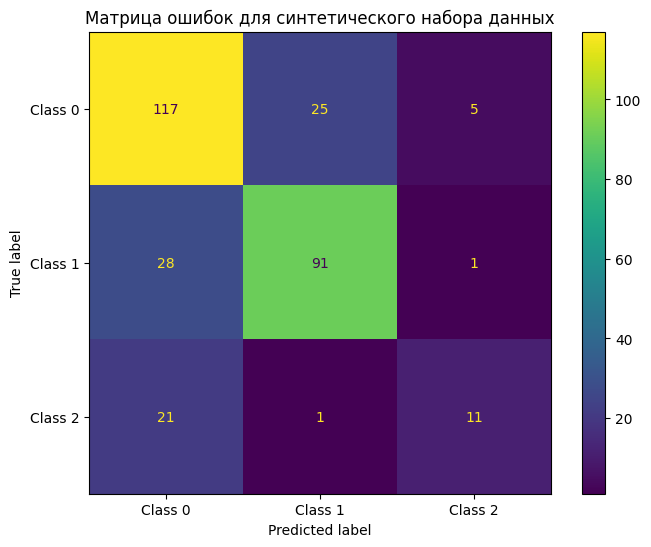

In [27]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax)
plt.title('Матрица ошибок для синтетического набора данных')
plt.show()

In [28]:
# Расчет precision micro вручную
# Суммируем все TP и все предсказанные положительные (TP + FP) для всех классов
tp_sum = np.sum(np.diag(cm))  # сумма элементов на главной диагонали (TP для всех классов)
pred_sum = np.sum(cm, axis=0)  # сумма по столбцам (все предсказания для каждого класса)
print(pred_sum)
precision_micro_manual = tp_sum / np.sum(pred_sum)

# Расчет precision micro с помощью sklearn
precision_micro_sklearn = precision_score(y_test, y_pred, average='micro')

print("Precision (micro) вручную:", precision_micro_manual)
print("Precision (micro) sklearn:", precision_micro_sklearn)

[166 117  17]
Precision (micro) вручную: 0.73
Precision (micro) sklearn: 0.73


In [29]:
# Расчет precision macro вручную
precisions = []
for i in range(len(class_names)):
    tp = cm[i, i]  # True Positive для класса i
    fp = np.sum(cm[:, i]) - tp  # False Positive для класса i
    if tp + fp > 0:  # избегаем деления на ноль
        precisions.append(tp / (tp + fp))
    else:
        precisions.append(0)
precision_macro_manual = np.mean(precisions)

# Расчет precision macro с помощью sklearn
precision_macro_sklearn = precision_score(y_test, y_pred, average='macro')

print("Precision (macro) вручную:", precision_macro_manual)
print("Precision (macro) sklearn:", precision_macro_sklearn)

Precision (macro) вручную: 0.7098852928052078
Precision (macro) sklearn: 0.7098852928052078


In [30]:
precisions

[0.7048192771084337, 0.7777777777777778, 0.6470588235294118]

In [31]:
# Расчет precision weighted вручную
class_counts = np.bincount(y_test, minlength=len(class_names))
weights = class_counts / np.sum(class_counts)
precision_weighted_manual = np.sum(precisions * weights)

In [32]:
precisions

[0.7048192771084337, 0.7777777777777778, 0.6470588235294118]

In [33]:
weights

array([0.49, 0.4 , 0.11])

In [34]:
# Расчет precision weighted с помощью sklearn
precision_weighted_sklearn = precision_score(y_test, y_pred, average='weighted')

print("Precision (weighted) вручную:", precision_weighted_manual)
print("Precision (weighted) sklearn:", precision_weighted_sklearn)

Precision (weighted) вручную: 0.727649027482479
Precision (weighted) sklearn: 0.7276490274824788


In [35]:
# Расчет recall micro вручную
# Для micro-average recall совпадает с precision
recall_micro_manual = precision_micro_manual

# Расчет recall micro с помощью sklearn
recall_micro_sklearn = recall_score(y_test, y_pred, average='micro')

print("Recall (micro) вручную:", recall_micro_manual)
print("Recall (micro) sklearn:", recall_micro_sklearn)

Recall (micro) вручную: 0.73
Recall (micro) sklearn: 0.73


In [36]:
# Расчет recall macro вручную
recalls = []
for i in range(len(class_names)):
    tp = cm[i, i]  # True Positive для класса i
    fn = np.sum(cm[i, :]) - tp  # False Negative для класса i
    if tp + fn > 0:  # избегаем деления на ноль
        recalls.append(tp / (tp + fn))
    else:
        recalls.append(0)
recall_macro_manual = np.mean(recalls)

# Расчет recall macro с помощью sklearn
recall_macro_sklearn = recall_score(y_test, y_pred, average='macro')

print("Recall (macro) вручную:", recall_macro_manual)
print("Recall (macro) sklearn:", recall_macro_sklearn)

Recall (macro) вручную: 0.6291950113378685
Recall (macro) sklearn: 0.6291950113378685


In [37]:
# Расчет recall weighted вручную
recall_weighted_manual = np.sum(recalls * weights)

# Расчет recall weighted с помощью sklearn
recall_weighted_sklearn = recall_score(y_test, y_pred, average='weighted')

print("Recall (weighted) вручную:", recall_weighted_manual)
print("Recall (weighted) sklearn:", recall_weighted_sklearn)

Recall (weighted) вручную: 0.73
Recall (weighted) sklearn: 0.73


In [38]:
# Расчет F1 micro вручную
# F1 = 2 * (precision * recall) / (precision + recall)
f1_micro_manual = 2 * (precision_micro_manual * recall_micro_manual) / (precision_micro_manual + recall_micro_manual)

# Расчет F1 micro с помощью sklearn
f1_micro_sklearn = f1_score(y_test, y_pred, average='micro')

print("F1 (micro) вручную:", f1_micro_manual)
print("F1 (micro) sklearn:", f1_micro_sklearn)

F1 (micro) вручную: 0.7299999999999999
F1 (micro) sklearn: 0.7299999999999999


In [39]:
# Расчет F1 macro вручную
f1_scores = []
for i in range(len(class_names)):
    if precisions[i] + recalls[i] > 0:  # избегаем деления на ноль
        f1_scores.append(2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i]))
    else:
        f1_scores.append(0)
f1_macro_manual = np.mean(f1_scores)

# Расчет F1 macro с помощью sklearn
f1_macro_sklearn = f1_score(y_test, y_pred, average='macro')

print("F1 (macro) вручную:", f1_macro_manual)
print("F1 (macro) sklearn:", f1_macro_sklearn)

F1 (macro) вручную: 0.6518454411057638
F1 (macro) sklearn: 0.6518454411057638


In [40]:
# Расчет F1 weighted вручную
f1_weighted_manual = np.sum(f1_scores * weights)

# Расчет F1 weighted с помощью sklearn
f1_weighted_sklearn = f1_score(y_test, y_pred, average='weighted')

print("F1 (weighted) вручную:", f1_weighted_manual)
print("F1 (weighted) sklearn:", f1_weighted_sklearn)

F1 (weighted) вручную: 0.7218988743748399
F1 (weighted) sklearn: 0.7218988743748399


 Все метрики для мультиклассовой классификации во всех вариантах усреднения можно посчитать с помощью `sklearn.metrics.classification_report`

In [41]:
from sklearn.metrics import classification_report

# Полный отчет по классификации
print("\nПолный отчет по классификации:")
print(classification_report(y_test, y_pred, target_names=class_names))


Полный отчет по классификации:
              precision    recall  f1-score   support

     Class 0       0.70      0.80      0.75       147
     Class 1       0.78      0.76      0.77       120
     Class 2       0.65      0.33      0.44        33

    accuracy                           0.73       300
   macro avg       0.71      0.63      0.65       300
weighted avg       0.73      0.73      0.72       300



### Вывод

В мультиклассовой классификации важен выбор метода усреднения метрик:


- **micro**: объединяет вклады всех классов (подходит для сбалансированных данных и ситуации когда мы хотим оценить общую Accuracy) 


- **macro**: вычисляет метрику для каждого класса и усредняет (можно использовать, если вклад каждого класс нам одинаково важен, даже если какой-то класс ощутимо меньше)


- **weighted**: учитывает поддержку (количество примеров) каждого класса при усреднении (хотим нормировать вклад каждого класса в финальную метрику относительно его размера)

Выбор метода зависит от требований к задаче и распределения классов.

## Метрики классификации, основанные на площади под кривой


### True Positive Rate & False Positive Rate

- **TPR (True Positive Rate)** или **Recall** - доля положительных примеров, которые были правильно классифицированы:

$$ \frac{TP}{TP+FN} $$

- **FPR (False Positive Rate)** - доля отрицательных примеров, которые были неправильно классифицированы как положительные:

$$ \frac{FP}{FP+TN} $$


### ROC-кривая

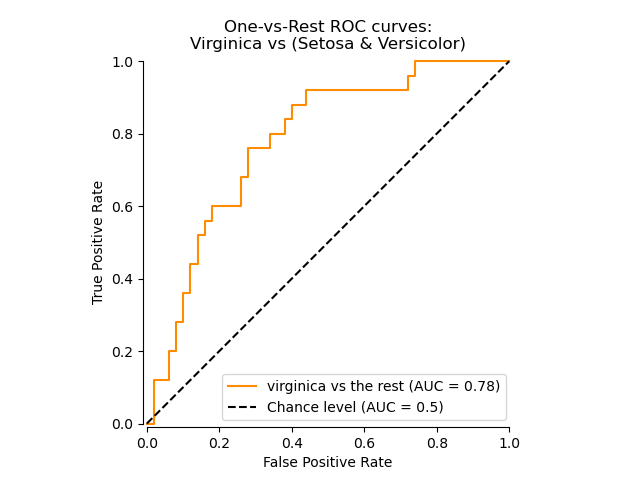


**ROC (Receiver Operating Characteristic)** - график зависимости TPR от FPR при различных порогах классификации.



#### Принцип построения ROC-кривой

1. Для каждого возможного порога классификации (от 0 до 1) вычисляются значения TPR и FPR
2. Полученные точки соединяются в кривую
3. Каждая точка на кривой соответствует конкретному порогу классификации
4. В график попадают пороги, которые меняют TPR и FPR


#### Интерпретация крайних значений

- При пороге = 1 (самый высокий): TPR ≈ 0, FPR ≈ 0 (все примеры классифицируются как отрицательные)

- При пороге = 0 (самый низкий): TPR ≈ 1, FPR ≈ 1 (все примеры классифицируются как положительные)



#### Что означает кривая

- Идеальная модель: кривая проходит через точку (0,1) - все положительные примеры классифицированы верно, ложных срабатываний нет

- Случайная модель: диагональная линия от (0,0) до (1,1)

- Чем выше кривая над диагональю, тем лучше модель различает классы


### AUC

**AUC** - Area Under Curve, площадь под кривой

**ROC AUC** - вероятность того, что модель ранжирует случайный положительный пример выше, чем случайный отрицательный.


- ROC AUC = 0.5: случайное угадывание
- ROC AUC = 1.0: идеальная классификация
- Обычно AUC > 0.8 считается хорошим результатом

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(cls_demo_df['true_label'], cls_demo_df['probability'])

roc_curve_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

In [43]:
cls_demo_df['probability'].drop_duplicates().sort_values(ascending=False)

11     0.990000
980    0.989728
818    0.983644
225    0.978827
473    0.975865
         ...   
126    0.014494
752    0.012417
838    0.011742
816    0.011388
6      0.010000
Name: probability, Length: 884, dtype: float64

In [44]:
print("Самые высокие пороги:")
print(roc_curve_df.sort_values(by='thresholds', ascending=False).head(10))

Самые высокие пороги:
       fpr    tpr  thresholds
0  0.00000  0.000         inf
1  0.00000  0.115    0.990000
2  0.00000  0.335    0.847063
3  0.00125  0.335    0.843002
4  0.00125  0.345    0.838423
5  0.00250  0.345    0.837551
6  0.00250  0.465    0.783939
7  0.00375  0.465    0.778714
8  0.00375  0.490    0.767879
9  0.00500  0.490    0.763985


In [45]:
print("Самые низкие пороги:")
print(roc_curve_df.sort_values(by='thresholds', ascending=True).head(10))

Самые низкие пороги:
         fpr    tpr  thresholds
116  1.00000  1.000    0.010000
115  0.88125  1.000    0.011388
114  0.82500  1.000    0.053838
113  0.82500  0.995    0.056697
112  0.35125  0.995    0.329816
111  0.35125  0.990    0.330082
110  0.28375  0.990    0.360423
109  0.28375  0.985    0.361075
108  0.27625  0.985    0.363264
107  0.27625  0.980    0.363688


ROC-AUC: 0.9663875000000001


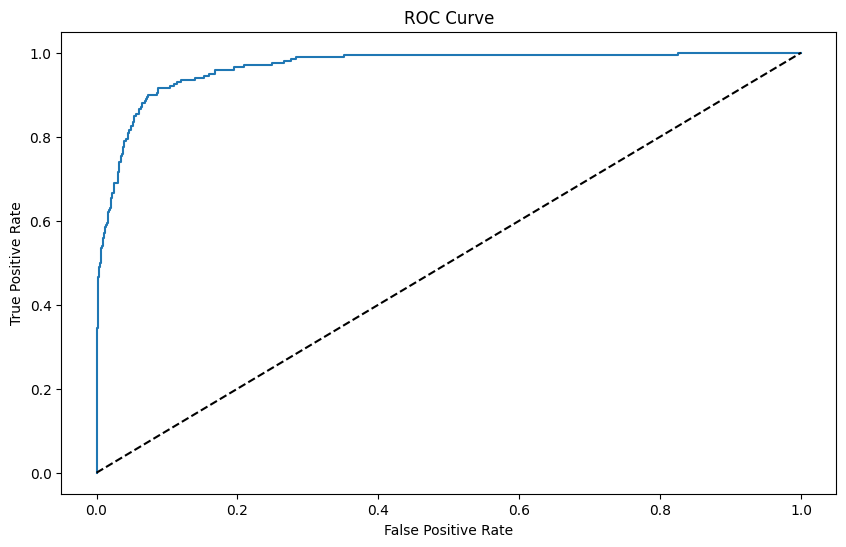

In [46]:
# Calculate ROC-AUC
auc_score = roc_auc_score(cls_demo_df['true_label'], cls_demo_df['probability'])
print(f"ROC-AUC: {auc_score}")

# plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');




А теперь построим ROC-кривую для случайных предсказаний:

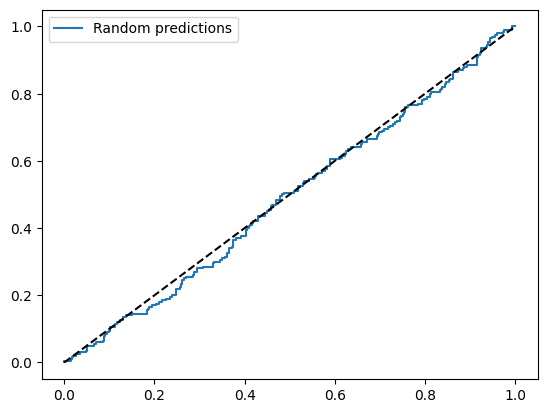

ROC-AUC для случайных предсказаний: 0.50930625


In [47]:
fpr_random, tpr_random, thresholds_random = roc_curve(cls_demo_df['true_label'], np.random.rand(len(cls_demo_df)))
plt.plot(fpr_random, tpr_random, label='Random predictions')
plt.plot([0, 1], [0, 1], 'k--',)
plt.legend()
plt.show()
print(f"ROC-AUC для случайных предсказаний: {roc_auc_score(cls_demo_df['true_label'], np.random.rand(len(cls_demo_df)))}")

### PR-кривая (Precision-Recall кривая)


- График зависимости точности от полноты при различных порогах
- **Average Precision (AP)** - площадь под кривой precision-recall
- Лучше, чем ROC-AUC для несбалансированных наборов данных
- Фокусируется на производительности положительного класса

Average Precision: 0.8986257029170779


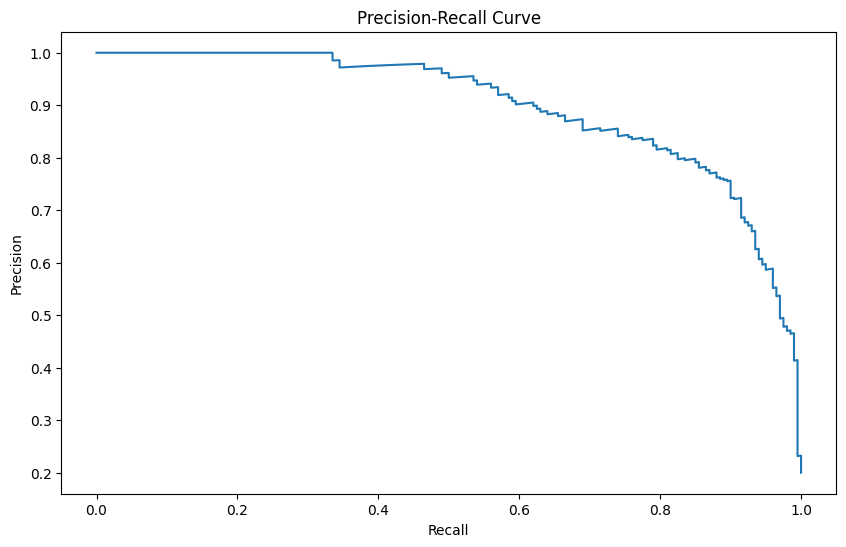

In [48]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(cls_demo_df['true_label'], cls_demo_df['probability'])

# Calculate average precision
ap_score = average_precision_score(cls_demo_df['true_label'], cls_demo_df['probability'])
print(f"Average Precision: {ap_score}")
# plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve');


  ### Сравнение ROC-AUC и PR-AUC на несбалансированных данных

In [49]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Генерация несбалансированного набора данных
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, 
                           n_redundant=3, n_classes=2, weights=[0.95, 0.05], 
                           random_state=42)

print(f"Распределение классов: Class 0 = {sum(y==0)}, Class 1 = {sum(y==1)}")
print(f"Соотношение классов (Class 1 / Class 0): {sum(y==1) / sum(y==0):.2f}")

Распределение классов: Class 0 = 9456, Class 1 = 544
Соотношение классов (Class 1 / Class 0): 0.06


In [50]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Получение вероятностей
y_prob = model.predict_proba(X_test)[:, 1]
y_prob[:10]

array([0.01218595, 0.00549989, 0.03060294, 0.04587534, 0.029518  ,
       0.00335455, 0.02409027, 0.00949415, 0.00557475, 0.03470452])

In [51]:
# Расчет ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Расчет PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

print(f"ROC_AUC: {roc_auc}")
print(f"PR_AUC:  {pr_auc}")

ROC_AUC: 0.7894159218457701
PR_AUC:  0.3401407949667164


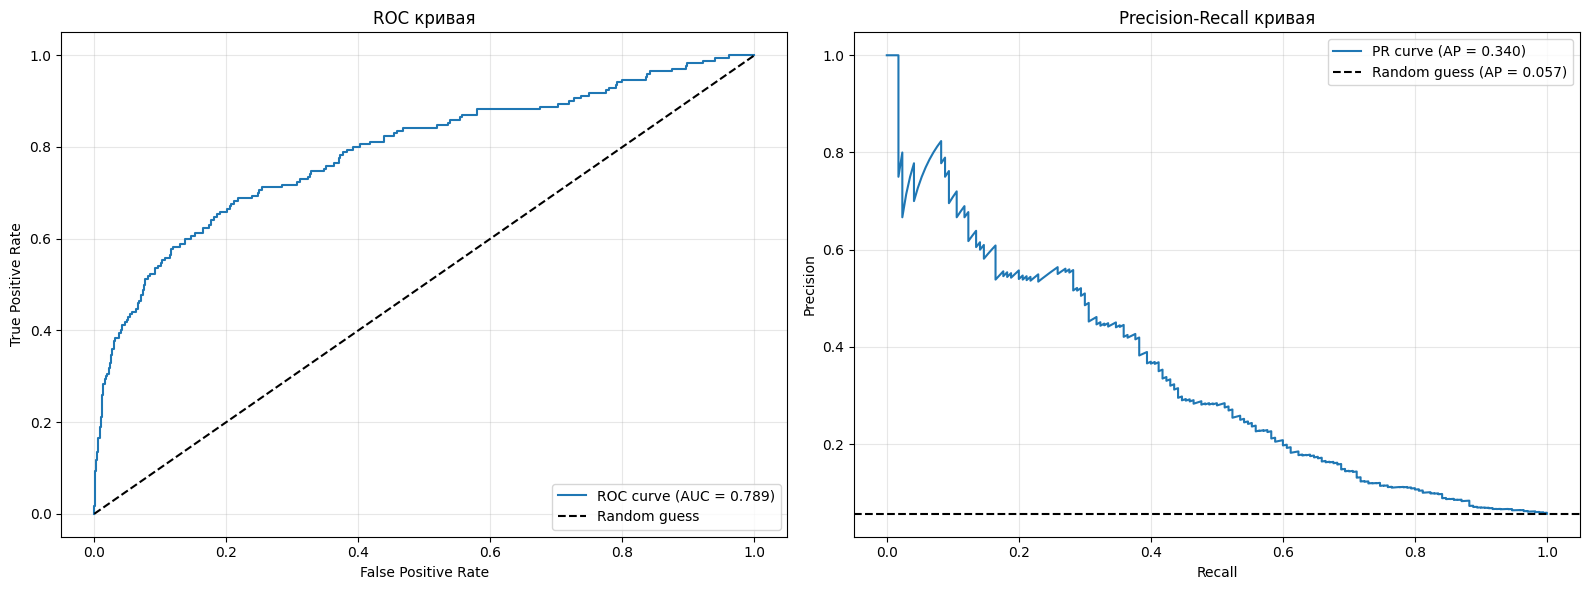

In [52]:
# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ROC кривая
ax1.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], 'k--', label='Random guess')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC кривая')
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# PR кривая
ax2.plot(recall, precision, label=f'PR curve (AP = {pr_auc:.3f})')
ax2.axhline(y=sum(y_test)/len(y_test), color='k', linestyle='--', 
           label=f'Random guess (AP = {sum(y_test)/len(y_test):.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall кривая')
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Вывод

- На сильно несбалансированных данных **ROC-AUC** может показывать оптимистичные результаты, в то время как **PR-AUC** более чувствителен к производительности модели на редком классе.


- **PR-кривая** фокусируется на положительном классе и не учитывает большое количество истинно отрицательных примеров, что делает её предпочтительной для несбалансированных данных.


## Руководство по выбору метрик классификации
 
| Метрика    | Когда использовать                                           |
|------------|--------------------------------------------------------------|
| Accuracy   | Сбалансированные наборы данных, равные затраты на ошибки     |
| Precision  | Когда ложноположительные результаты дорого обходятся         |
| Recall     | Когда ложноотрицательные результаты дорого обходятся         |
| F1 Score   | Баланс между точностью и полнотой                            |
| AUC-ROC    | Качество ранжирования, независимость от порога               |
| PR-AUC     | Несбалансированные наборы данных, фокус на положительном классе |
 

# Метрики регрессии

## Mean Squared Error (MSE, Среднеквадратичная ошибка)

$$ \frac{1}{N} \sum (y_i - \hat{y}_i)^2 $$

- Сильнее штрафует большие ошибки
- Не в тех же единицах измерения, что и целевая переменная 
- Дифференцируема, что позволяет использовать её как функцию потерь при обучении

In [53]:
reg_demo_df = pd.read_csv('/Users/mikhail/Data Science Projects/Цифровая кафедра/ML/Module 3.4 Метрики и функции потерь/regression_demo.csv')
reg_demo_df.head()



,x_value,true_value,linear_prediction,rf_prediction,poly_prediction,linear_error,rf_error,poly_error,linear_error_type,rf_error_type,poly_error_type
0,7.072386,6.801448,5.801729,7.138790,5.898081,0.999719,-0.337341,0.903368,Medium,Small,Medium
1,1.525390,5.409787,3.355995,3.676808,3.385879,2.053792,1.732979,2.023908,Large,Large,Large
2,5.762884,3.119907,5.224354,5.605878,4.940256,-2.104447,-2.485970,-1.820349,Large,Large,Large
3,6.067150,4.773718,5.358509,4.778129,5.163511,-0.584791,-0.004412,-0.389793,Medium,Small,Small
4,4.241307,3.212853,4.553474,2.586345,3.935242,-1.340620,0.626509,-0.722389,Large,Medium,Medium


In [54]:
from sklearn.metrics import mean_squared_error

# Calculate MSE manually
mse_manual = np.mean((reg_demo_df['true_value'] - reg_demo_df['linear_prediction'])**2)

# Calculate MSE using sklearn
mse_sklearn = mean_squared_error(reg_demo_df['true_value'], reg_demo_df['linear_prediction'])

print(f"MSE (manual): {mse_manual}")
print(f"MSE (sklearn): {mse_sklearn}")

MSE (manual): 1.9150984441289378
MSE (sklearn): 1.9150984441289378


## RMSE (Root Mean Squared Error, Среднеквадратичная ошибка)

$$\sqrt{\frac{1}{N} \sum (y_i - \hat{y}_i)^2}$$

- Сильнее штрафует большие ошибки
- В тех же единицах измерения, что и целевая переменная

In [55]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE manually
rmse_manual = np.sqrt(np.mean((reg_demo_df['true_value'] - reg_demo_df['linear_prediction'])**2))

# Calculate RMSE using sklearn
rmse_sklearn = mean_squared_error(reg_demo_df['true_value'], reg_demo_df['linear_prediction'], squared=False)

print(f"RMSE (manual): {rmse_manual}")
print(f"RMSE (sklearn): {rmse_sklearn}")

RMSE (manual): 1.383870819162301
RMSE (sklearn): 1.383870819162301


## MAE (Mean Absolute Error, Средняя абсолютная ошибка)

$$\frac{1}{N} \sum |y_i - \hat{y}_i|$$

- Не штрафует большие ошибки
- В тех же единицах измерения, что и целевая переменная

In [56]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE manually
mae_manual = np.mean(np.abs(reg_demo_df['true_value'] - reg_demo_df['linear_prediction']))

# Calculate MAE using sklearn
mae_sklearn = mean_absolute_error(reg_demo_df['true_value'], reg_demo_df['linear_prediction'])

print(f"MAE (manual): {mae_manual}")
print(f"MAE (sklearn): {mae_sklearn}")

MAE (manual): 1.1434218872207933
MAE (sklearn): 1.1434218872207933


  ### Сравнение MSE и MAE на данных с выбросами

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

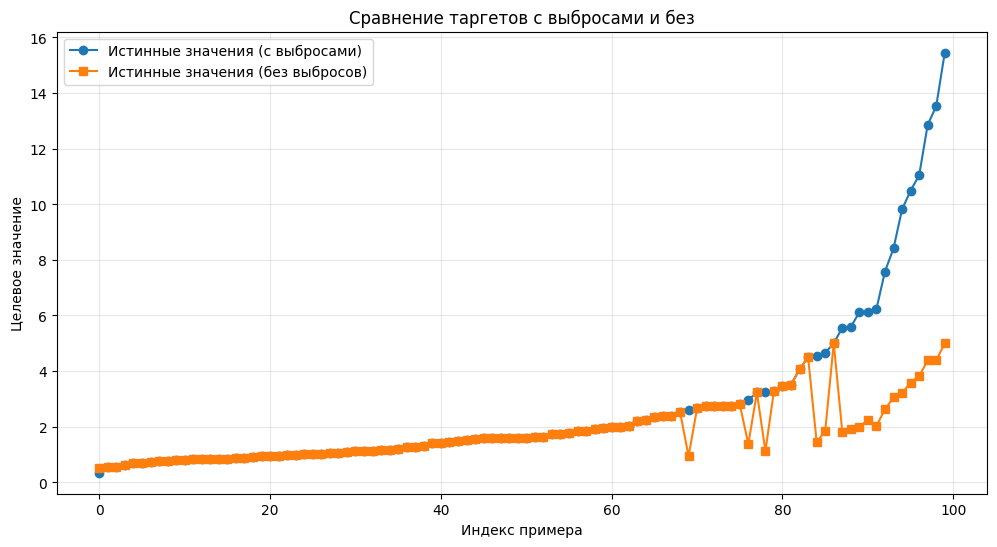

In [58]:
# Загрузка набора данных California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Создание двух наборов данных: с выбросами и без
np.random.seed(42)
y_with_outliers = y.copy()
outlier_indices = np.random.choice(len(y), size=int(0.05 * len(y)), replace=False)
y_with_outliers[outlier_indices] = y_with_outliers[outlier_indices] * 3 + np.random.normal(0, 0.5, size=len(outlier_indices))

# Разделение на обучающую и тестовую выборки для обоих наборов данных
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(
    X, y_with_outliers, test_size=0.3, random_state=42)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Визуализация таргетов с выбросами и без
plt.figure(figsize=(12, 6))

# Наборы данных для графика
sample_indices = np.random.choice(len(y_test_outliers), size=100, replace=False)
x_plot = np.arange(len(sample_indices))
y_true_outliers = y_test_outliers[sample_indices]
y_true_clean = y_test_clean[sample_indices]

# Сортировка по истинным значениям для лучшей визуализации
sort_idx = np.argsort(y_true_outliers)
y_true_outliers = y_true_outliers[sort_idx]
y_true_clean = y_true_clean[sort_idx]

# График
plt.plot(x_plot, y_true_outliers, 'o-', label='Истинные значения (с выбросами)')
plt.plot(x_plot, y_true_clean, 's-', label='Истинные значения (без выбросов)')
plt.legend()
plt.title('Сравнение таргетов с выбросами и без')
plt.xlabel('Индекс примера')
plt.ylabel('Целевое значение')
plt.grid(alpha=0.3)
plt.show()

In [59]:
# Обучение моделей
# Модель на данных с выбросами
model_outliers = LinearRegression()
model_outliers.fit(X_train_outliers, y_train_outliers)

# Модель на чистых данных
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)

# Предсказания
y_pred_outliers = model_outliers.predict(X_test_outliers)
y_pred_clean = model_clean.predict(X_test_clean)

In [60]:
# Расчет метрик для модели, обученной на данных с выбросами
outliers_mse = mean_squared_error(y_test_outliers, y_pred_outliers)
outliers_rmse = np.sqrt(outliers_mse)
outliers_mae = mean_absolute_error(y_test_outliers, y_pred_outliers)

# Расчет метрик для модели, обученной на чистых данных
clean_mse = mean_squared_error(y_test_clean, y_pred_clean)
clean_rmse = np.sqrt(clean_mse)
clean_mae = mean_absolute_error(y_test_clean, y_pred_clean)

print("Метрики для модели, обученной на данных с выбросами:")
print(f"MSE: {outliers_mse:.4f}")
print(f"RMSE: {outliers_rmse:.4f}")
print(f"MAE: {outliers_mae:.4f}")
print(f"Отношение RMSE/MAE: {outliers_rmse/outliers_mae:.4f}")

print("\nМетрики для модели, обученной на чистых данных:")
print(f"MSE: {clean_mse:.4f}")
print(f"RMSE: {clean_rmse:.4f}")
print(f"MAE: {clean_mae:.4f}")
print(f"Отношение RMSE/MAE: {clean_rmse/clean_mae:.4f}")

Метрики для модели, обученной на данных с выбросами:
MSE: 4.7715
RMSE: 2.1844
MAE: 1.1406
Отношение RMSE/MAE: 1.9150

Метрики для модели, обученной на чистых данных:
MSE: 0.5306
RMSE: 0.7284
MAE: 0.5272
Отношение RMSE/MAE: 1.3815


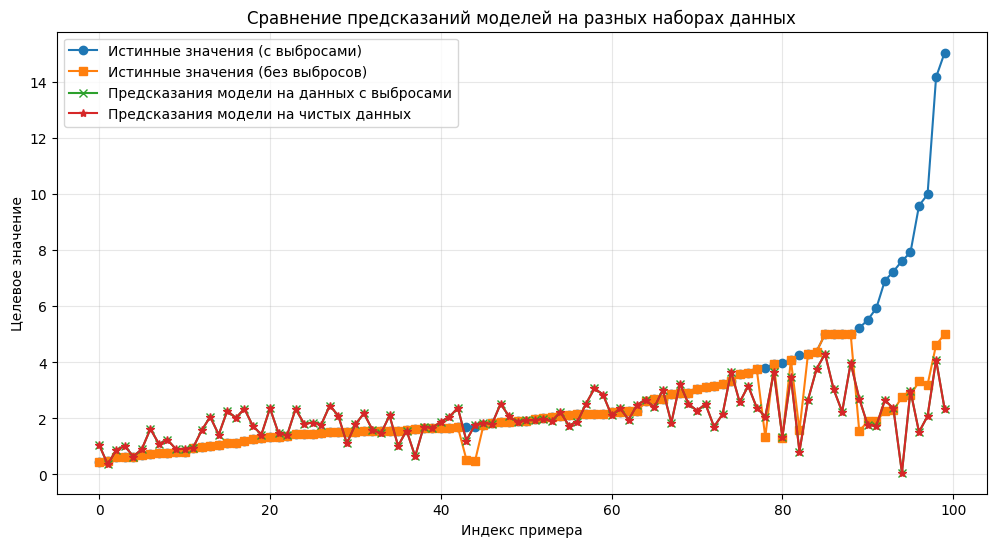

In [93]:
# Визуализация разницы между моделями
plt.figure(figsize=(12, 6))

# Наборы данных для графика
sample_indices = np.random.choice(len(y_test_outliers), size=100, replace=False)
x_plot = np.arange(len(sample_indices))
y_true_outliers = y_test_outliers[sample_indices]
y_true_clean = y_test_clean[sample_indices]
pred_outliers = y_pred_outliers[sample_indices]
pred_clean = y_pred_clean[sample_indices]

# Сортировка по истинным значениям для лучшей визуализации
sort_idx = np.argsort(y_true_outliers)
y_true_outliers = y_true_outliers[sort_idx]
y_true_clean = y_true_clean[sort_idx]
pred_outliers = pred_outliers[sort_idx]
pred_clean = pred_clean[sort_idx]

# График
plt.plot(x_plot, y_true_outliers, 'o-', label='Истинные значения (с выбросами)')
plt.plot(x_plot, y_true_clean, 's-', label='Истинные значения (без выбросов)')
plt.plot(x_plot, pred_outliers, 'x-', label='Предсказания модели на данных с выбросами')
plt.plot(x_plot, pred_clean, '*-', label='Предсказания модели на чистых данных')
plt.legend()
plt.title('Сравнение предсказаний моделей на разных наборах данных')
plt.xlabel('Индекс примера')
plt.ylabel('Целевое значение')
plt.grid(alpha=0.3)
plt.show()

### Вывод

- **MSE** сильнее штрафует за большие ошибки, что делает его более чувствительным к выбросам.


- **MAE** менее чувствителен к выбросам, поэтому часто предпочтительнее в задачах с зашумленными данными.


- Отношение **RMSE/MAE** является хорошим индикатором наличия выбросов: чем больше это отношение, тем сильнее влияние выбросов на метрику.

## MAPE (Mean Absolute Percentage Error, Средняя абсолютная процентная ошибка)

$$\text{MAPE} = \frac{100\%}{N} \sum_{i=1}^{N} \frac{|y_i - \hat{y}_i|}{|y_i|}$$


- Не зависит от масштаба, интерпретируется как процент
- Несимметричная метрика: ошибки зависят только от фактического значения
- Проблемы, когда y_true равно или близко к нулю, не определена при y_true = 0
- Диапазон: [0, ∞)

In [61]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE manually
mape_manual = np.mean(np.abs((reg_demo_df['true_value'] - reg_demo_df['linear_prediction']) / np.abs(reg_demo_df['true_value'])))

# Calculate MAPE using sklearn
mape_sklearn = mean_absolute_percentage_error(reg_demo_df['true_value'], reg_demo_df['linear_prediction'])

print(f"MAPE (manual): {mape_manual}")
print(f"MAPE (sklearn): {mape_sklearn}")

MAPE (manual): 0.3630528213543225
MAPE (sklearn): 0.3630528213543225


## SMAPE (Symmetric Mean Absolute Percentage Error, Симметричная средняя абсолютная процентная ошибка)

$$\frac{100\%}{N} \sum \frac{|y_i - \hat{y}_i|}{\frac{|y_i| + |\hat{y}_i|}{2}}$$

- Симметричная метрика, ошибки зависят от фактического и предсказанного значения
- Более устойчива к нулевым значениям
- Диапазон: [0, 200]

In [62]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate SMAPE manually
smape_manual = np.mean(np.abs((reg_demo_df['true_value'] - reg_demo_df['linear_prediction']) / ((np.abs(reg_demo_df['true_value']) + np.abs(reg_demo_df['linear_prediction'])) / 2))) * 100

# Calculate SMAPE using sklearn
# N/A

print(f"SMAPE (manual): {smape_manual}")

SMAPE (manual): 26.86438089049952


## WAPE (Weighted Absolute Percentage Error, Средневзвешенная абсолютная процентная ошибка)

$$\frac{\sum |y_i - \hat{y}_i|}{\sum |y_i|} * 100\%$$

- Учитывает общую сумму ошибок относительно общей суммы фактических значений
- Менее чувствительна к выбросам, чем MAPE
- Диапазон: [0%, ∞)

In [63]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate WAPE manually
wape_manual = np.sum(np.abs((reg_demo_df['true_value'] - reg_demo_df['linear_prediction']) )) / np.sum(np.abs(reg_demo_df['true_value'])) * 100

print(f"WAPE (manual): {wape_manual}")

WAPE (manual): 24.343300389261458


  ### Сравнение MAPE, SMAPE и WAPE на данных с разными масштабами

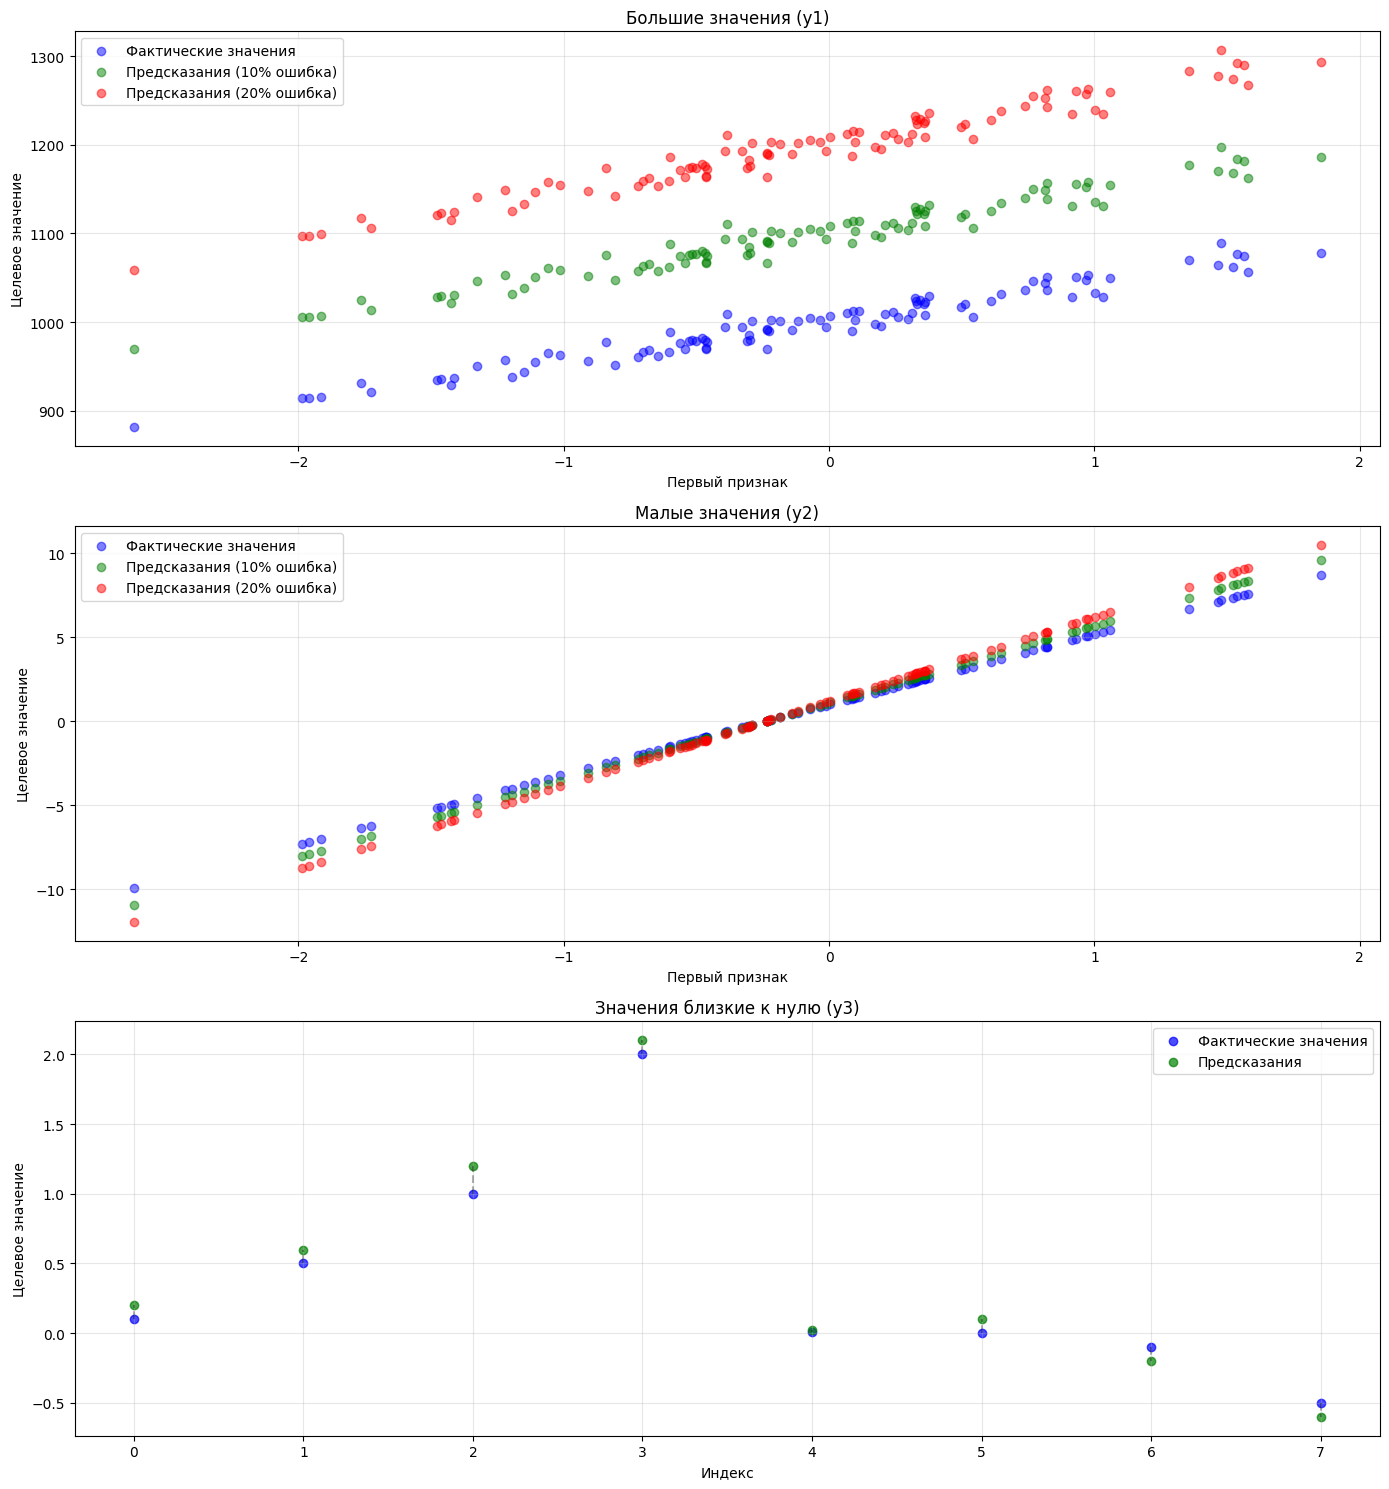

In [64]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Функция для расчета SMAPE
def smape(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred)) / 2)) * 100

# Функция для расчета WAPE
def wape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100


# Генерация двух наборов данных с разными масштабами
np.random.seed(42)
X1, y1 = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
y1 = y1 + 1000  # Большие значения

X2, y2 = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
y2 = y2 / 10 + 1  # Малые значения (от 0 до примерно 2)

# Создание предсказаний с фиксированной относительной ошибкой
y1_pred_10pct = y1 * 1.1  # 10% ошибка
y1_pred_20pct = y1 * 1.2  # 20% ошибка

y2_pred_10pct = y2 * 1.1  # 10% ошибка
y2_pred_20pct = y2 * 1.2  # 20% ошибка

# Добавим несколько значений, близких к нулю или отрицательных для демонстрации проблем MAPE
y3 = np.array([0.1, 0.5, 1.0, 2.0, 0.01, 0.0, -0.1, -0.5])
y3_pred = np.array([0.2, 0.6, 1.2, 2.1, 0.02, 0.1, -0.2, -0.6])

# Визуализация исходных данных
# Визуализация исходных данных и предсказаний
fig, axs = plt.subplots(3, 1, figsize=(14, 15))

# Большие значения (y1)
axs[0].scatter(X1, y1, label='Фактические значения', alpha=0.5, color='blue')
axs[0].scatter(X1, y1_pred_10pct, label='Предсказания (10% ошибка)', alpha=0.5, color='green')
axs[0].scatter(X1, y1_pred_20pct, label='Предсказания (20% ошибка)', alpha=0.5, color='red')
axs[0].set_title('Большие значения (y1)')
axs[0].set_xlabel('Первый признак')
axs[0].set_ylabel('Целевое значение')
axs[0].legend()
axs[0].grid(alpha=0.3)

# Малые значения (y2)
axs[1].scatter(X2, y2, label='Фактические значения', alpha=0.5, color='blue')
axs[1].scatter(X2, y2_pred_10pct, label='Предсказания (10% ошибка)', alpha=0.5, color='green')
axs[1].scatter(X2, y2_pred_20pct, label='Предсказания (20% ошибка)', alpha=0.5, color='red')
axs[1].set_title('Малые значения (y2)')
axs[1].set_xlabel('Первый признак')
axs[1].set_ylabel('Целевое значение')
axs[1].legend()
axs[1].grid(alpha=0.3)

# Значения близкие к нулю (y3)
axs[2].scatter(range(len(y3)), y3, label='Фактические значения', alpha=0.7, color='blue')
axs[2].scatter(range(len(y3_pred)), y3_pred, label='Предсказания', alpha=0.7, color='green')
for i in range(len(y3)):
    axs[2].plot([i, i], [y3[i], y3_pred[i]], 'k--', alpha=0.3)
axs[2].set_title('Значения близкие к нулю (y3)')
axs[2].set_xlabel('Индекс')
axs[2].set_ylabel('Целевое значение')
axs[2].legend()
axs[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [65]:
# Расчет метрик для разных наборов данных
results = []


# Для большого масштаба с 10% ошибкой
mape1_10 = np.mean(np.abs((y1 - y1_pred_10pct) / y1)) * 100
smape1_10 = smape(y1, y1_pred_10pct)
wape1_10 = wape(y1, y1_pred_10pct)
results.append(['Большой масштаб (10% ошибка)', mape1_10, smape1_10, wape1_10])


# Для большого масштаба с 20% ошибкой
mape1_20 = np.mean(np.abs((y1 - y1_pred_20pct) / y1)) * 100
smape1_20 = smape(y1, y1_pred_20pct)
wape1_20 = wape(y1, y1_pred_20pct)
results.append(['Большой масштаб (20% ошибка)', mape1_20, smape1_20, wape1_20])


# Для малого масштаба с 10% ошибкой
mape2_10 = np.mean(np.abs((y2 - y2_pred_10pct) / y2)) * 100
smape2_10 = smape(y2, y2_pred_10pct)
wape2_10 = wape(y2, y2_pred_10pct)
results.append(['Малый масштаб (10% ошибка)', mape2_10, smape2_10, wape2_10])


# Для малого масштаба с 20% ошибкой
mape2_20 = np.mean(np.abs((y2 - y2_pred_20pct) / y2)) * 100
smape2_20 = smape(y2, y2_pred_20pct)
wape2_20 = wape(y2, y2_pred_20pct)
results.append(['Малый масштаб (20% ошибка)', mape2_20, smape2_20, wape2_20])


# Для данных с близкими к нулю значениями
try:
    mape3 = np.mean(np.abs((y3 - y3_pred) / y3)) * 100
except ZeroDivisionError:
    mape3 = np.inf
    
smape3 = smape(y3, y3_pred)
wape3 = wape(y3, y3_pred)
results.append(['Данные с близкими к нулю значениями', mape3, smape3, wape3])


# Создание DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Набор данных', 'MAPE (%)', 'SMAPE (%)', 'WAPE (%)'])
print(results_df)

                          Набор данных  MAPE (%)  SMAPE (%)   WAPE (%)
0         Большой масштаб (10% ошибка)      10.0   9.523810  10.000000
1         Большой масштаб (20% ошибка)      20.0  18.181818  20.000000
2           Малый масштаб (10% ошибка)      10.0   9.523810  10.000000
3           Малый масштаб (20% ошибка)      20.0  18.181818  20.000000
4  Данные с близкими к нулю значениями       inf  57.427938  19.239905


/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_21036/1599821991.py:35: RuntimeWarning: divide by zero encountered in divide
  mape3 = np.mean(np.abs((y3 - y3_pred) / y3)) * 100


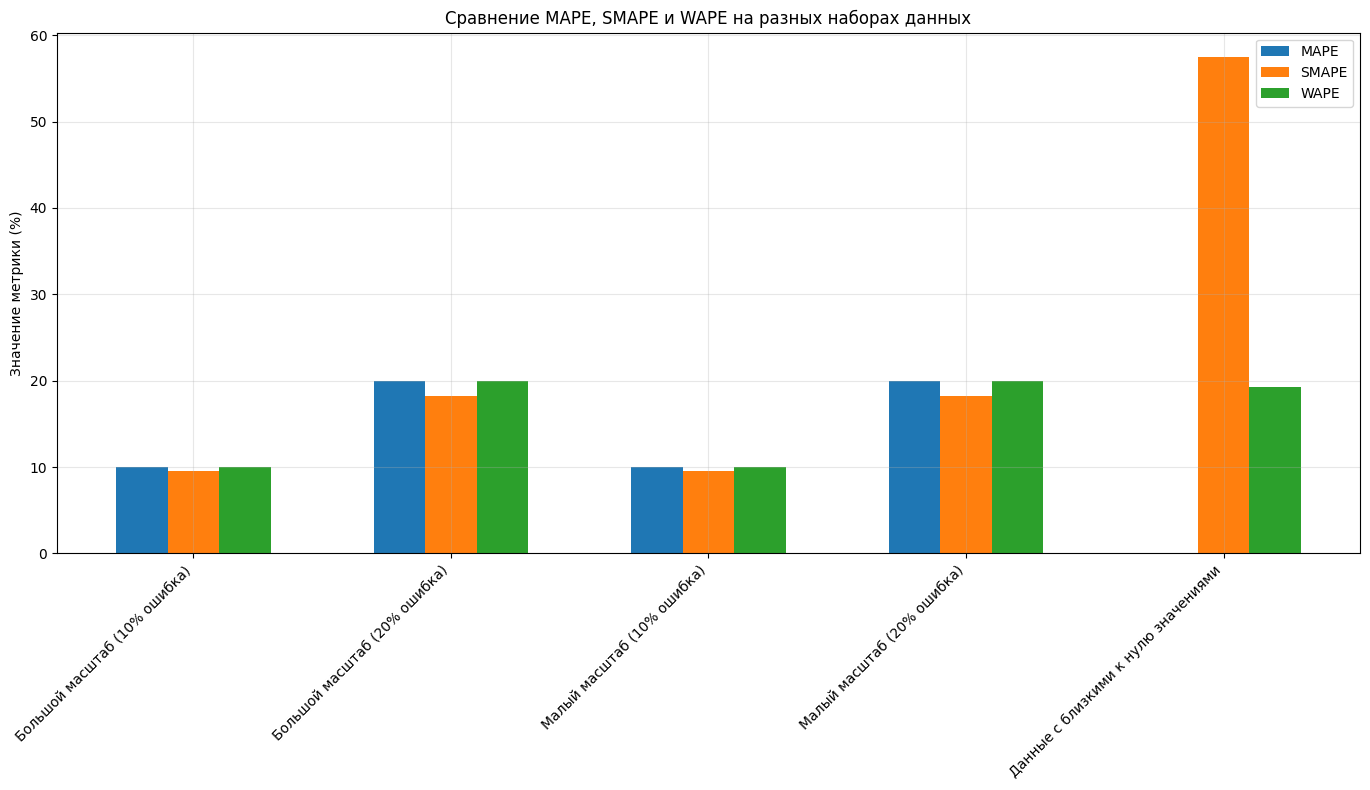

In [66]:
# Визуализация результатов
plt.figure(figsize=(14, 8))
plt.bar(np.arange(len(results_df))-0.2, results_df['MAPE (%)'].fillna(0), width=0.2, label='MAPE')
plt.bar(np.arange(len(results_df)), results_df['SMAPE (%)'], width=0.2, label='SMAPE')
plt.bar(np.arange(len(results_df))+0.2, results_df['WAPE (%)'], width=0.2, label='WAPE')
plt.xticks(np.arange(len(results_df)), results_df['Набор данных'], rotation=45, ha='right')
plt.ylabel('Значение метрики (%)')
plt.title('Сравнение MAPE, SMAPE и WAPE на разных наборах данных')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Вывод

- **MAPE** простая и понятная метрика, но имеет серьезные проблемы с значениями близкими к нулю или отрицательными

- **SMAPE** решает проблему значений близких к нулю, но все еще может иметь проблемы с отрицательными значениями

- **WAPE** менее чувствителен к экстремальным значениям и работает лучше на несбалансированных данных

На данных с разными масштабами, все три метрики дают схожие результаты для одинаковой относительной ошибки, что делает их полезными для сравнения моделей на разных наборах данных.

## R-squared (Коэффициент детерминации)

$$1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$


- Доля дисперсии, объясняемая моделью
- Диапазон: [-∞, 1]
- 1 = идеальное предсказание
- 0 = случайное угадывание

In [112]:
from sklearn.metrics import r2_score

# Calculate R-squared manually
r2_manual = 1 - (np.sum((reg_demo_df['true_value'] - reg_demo_df['linear_prediction'])**2) / np.sum((reg_demo_df['true_value'] - np.mean(reg_demo_df['true_value']))**2))

# Calculate R-squared using sklearn
r2_sklearn = r2_score(reg_demo_df['true_value'], reg_demo_df['linear_prediction'])

print(f"R-squared (manual): {r2_manual}")
print(f"R-squared (sklearn): {r2_sklearn}")

R-squared (manual): 0.48528928321151565
R-squared (sklearn): 0.48528928321151565


## Руководство по выбору метрик регрессии

| Метрика | Когда использовать |
|---------|-------------------|
| MSE | Когда большие ошибки должны штрафоваться сильнее |
| RMSE | Когда нужна ошибка в тех же единицах, что и целевая переменная |
| MAE | Когда выбросы не должны иметь чрезмерного влияния |
| MAPE | Для относительных ошибок, когда данные строго положительные и далеки от нуля |
| SMAPE | Для относительных ошибок, когда есть значения близкие к нулю, но нет отрицательных |
| WAPE | Для относительных ошибок на несбалансированных данных или при наличии выбросов |
| R² | Понимание доли объясненной дисперсии |
